In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt

# Paraliste:
timesteps = 10
dim = 2
dens = 1
rc = 2
birthrate = 0.5
deathrate = 0.1

# Ausgabe aller Indizes
ausgabe = True
saving = False
id = 0

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


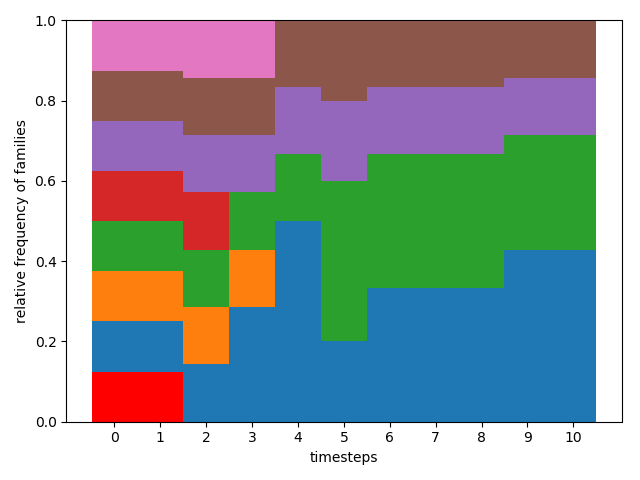

In [2]:
# Durchlauf
lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance', bc='reflecting',\
               density = dens, dims = dim, r_b = birthrate, variation = False, restchannels = rc ,r_d = deathrate)
lgca.timeevo(timesteps, record=True)
%matplotlib notebook
lgca.bar_stacked_relative(save = saving, id = id)
if saving:
    save_data(lgca, id = id)

In [3]:
# alle Maße
if ausgabe:
    print('Shannonindex ', entropies(lgca,1)) 
    print('Simpsonindex ', entropies(lgca,1.5))
    print('Ginisimpsonindex ', entropies(lgca,2))


Shannon
Shannonindex  (array([2.07944154, 2.07944154, 1.94591015, 1.7478681 , 1.24245332,
       1.33217904, 1.32966135, 1.32966135, 1.32966135, 1.27703426,
       1.27703426]), 2.0794415416798357)
simpson
Simpsonindex  [1.         1.         1.         0.95238095 0.8        0.9
 0.86666667 0.86666667 0.86666667 0.80952381 0.80952381]
ginisimpson
Ginisimpsonindex  [0.875      0.875      0.85714286 0.81632653 0.66666667 0.72
 0.72222222 0.72222222 0.72222222 0.69387755 0.69387755]


Shannon
simpson
ginisimpson


<IPython.core.display.Javascript object>


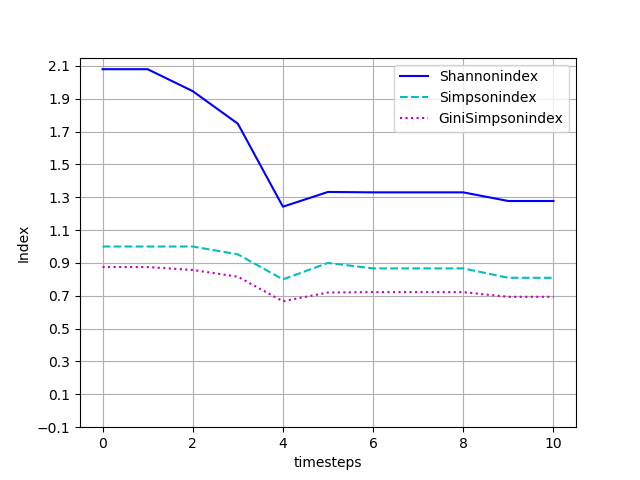

In [4]:
plot_entropies_together(lgca, saving)

In [5]:
if ausgabe:
    print('Hill erster Ordnung ', hillnumber(lgca,1))
    print('Hill zweiter Ordnung ', hillnumber(lgca,2))
    print('Hill dritter Ordnung ', hillnumber(lgca,3))

exp Shannon
Shannon
Hill erster Ordnung  (array([8.        , 8.        , 7.        , 5.74234749, 3.46410162,
       3.78929142, 3.77976315, 3.77976315, 3.77976315, 3.58598883,
       3.58598883]), 7.999999999999998)
hillnumber order 2
Hill zweiter Ordnung  [8.         8.         7.         5.44444444 3.         3.57142857
 3.6        3.6        3.6        3.26666667 3.26666667]
hillnumber order 3
Hill dritter Ordnung  [8.         8.         7.         5.1365957  2.68328157 3.37099931
 3.46410162 3.46410162 3.46410162 3.04471185 3.04471185]


exp Shannon
Shannon
hillnumber order 2
hillnumber order 3


<IPython.core.display.Javascript object>


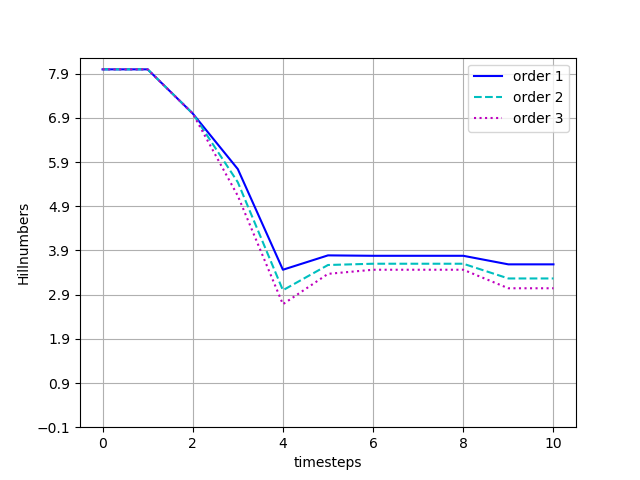

In [6]:
plot_hill_together(lgca, saving)